<a href="https://colab.research.google.com/github/johnreyes96/artificial-vision/blob/master/src/main/python/classes/LowPassFilter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importar numpy para dar soporte a:
# Concatenación de matrices - np.concatenate
import numpy as np

import math

# Importar el módulo cv2 de la librería opencv
import cv2
from google.colab.patches import cv2_imshow

# Soporte para visualización.
import matplotlib.pyplot as plt

# Soporte para funciones de la librería scipy
from scipy import signal
from scipy import misc

# 14 de septiembre de 2022 - Soporte
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error



(a.) Enlazar Google Drive y cargar imagen en variable.

0
255


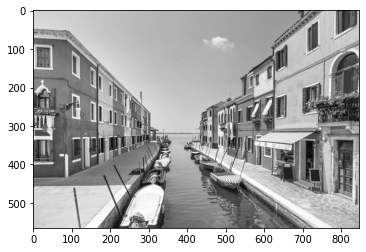

In [ ]:
# Se debe conectar con el Drive, y luego buscar la ruta correcta para leer la imagen
imagenEntrada = cv2.imread('/content/drive/MyDrive/VA/29agosto/HCColor2.jpg',cv2.IMREAD_GRAYSCALE) # Considerar la 4, 4a, 5 
# imagenEntrada = cv2.cvtColor(imagenEntrada, cv2.COLOR_BGR2RGB) # OpenCV usa el ordenamiento BGR por defecto, mientras que matplotlib asume RGB.

plotInputIm = plt.imshow(imagenEntrada, cmap="gray", vmin=0, vmax=255)

print(np.min(imagenEntrada))
print(np.max(imagenEntrada))

Ejercicios:

(1.) Calcule la similaridad estructural entre dos imágenes en escala de grises. Evalúe su utilidad al comparar una imagen de referencia, con una versión modificada luedo de aplicarle un filtrado pasa-bajos.

https://stackoverflow.com/questions/71567315/how-to-get-the-ssim-comparison-score-between-two-images

(2.) Muestre que las direcciones de gradiente se pueden utilizar para caracterizar la información visual de una imagen. Calcule las direcciones de gradiente, y almanecelas en un histograma. Esto último, a partir de una modificación de la función fnHistograma.



In [ ]:
# Se procede a convolucionar la imagen con un filtro pasa-altos o uno pasa-bajos.
# Para el filtrado pasa-altos considere un filtro de Sobel: https://en.wikipedia.org/wiki/Sobel_operator

# A continuación, se requiere impolementar una función que haga un filtrado pasa-altos o pasa-bajos, según sea la prefencia del usuario.
# Como argumentos de entrada debe recibir la imagen bajo inspección, y un enfoque: una cadena de caracteres indicando si el filtrado es
# pasa-bajos o pasa-altos.

# Caso 1: Aplicar filtrado pasa-altos, usando operadores de prewitt.
#
# Declarar los kernels de Prewitt
Hx = np.array([[1, 0, -1],[1, 0, -1],[1, 0, -1]])
Hy = np.array([[1, 1, 1],[0, 0, 0],[-1, -1, -1]])

# Calcular las componentes de gradiente
# Para calcular la convolución: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html

Gx = signal.convolve2d(imagenEntrada, Hx, boundary='symm', mode='same')
Gy = signal.convolve2d(imagenEntrada, Hy, boundary='symm', mode='same')

# Calcular magnitud del gradiente
MG = np.sqrt((Gx**2) + (Gy**2))

 
# Estructura np.array: variable = np.array([[C_11, C_12, -C_13],[C_21, C_22, C_23],[C_31, C_32, C_33]])



Visualización de las imágenes de entrada y salida.

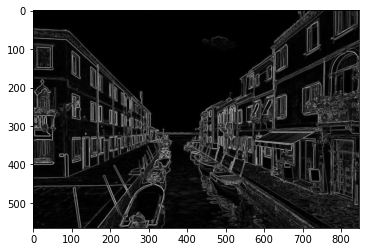

In [ ]:
plotOutputIm = plt.imshow(MG, cmap="gray") #, vmin=0, vmax=255)

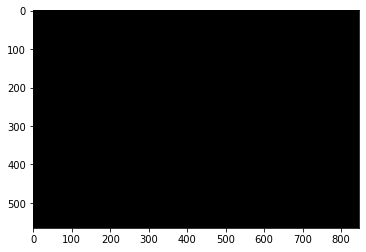

In [ ]:
#¡como calcular similitud?
(score,ssmMap)=ssim(imagenEntrada,imagenEntrada,full=True)

plotssmMapm = plt.imshow(ssmMap, cmap="gray")

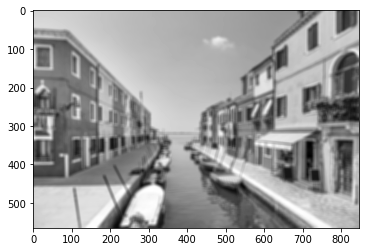

In [ ]:
#cOMO APLICAR FILTRADO PASA-BAJO DE TAMAÑO VARIABLE; FILTRO PROMEDIO
n = 9
kernel= (1/(n*n))*np.ones([n,n])
filtIm=signal.convolve2d(imagenEntrada, kernel, boundary='symm', mode='same')
plot_filtIm = plt.imshow(filtIm, cmap="gray") #, vmin=0, vmax=255)


In [ ]:
#PLOTEAR SSIM 
start=3
stop=51
step=2
ssimVals=[]
n=list(range(start,stop,step))
for kSize in n:
  kernel= (1/(kSize*kSize))*np.ones([kSize,kSize])
  filtIm=signal.convolve2d(imagenEntrada, kernel, boundary='symm', mode='same')
  (score,ssimMap)=ssim(imagenEntrada,filtIm,full=True)
  ssimVals.append(score)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  # Remove the CWD from sys.path while we load stuff.


Text(0, 0.5, 'Valor - SSIM')

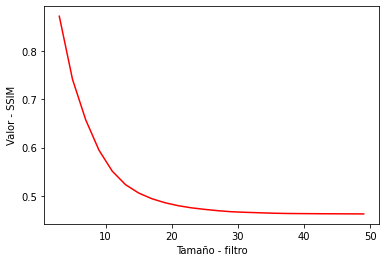

In [ ]:
#ploteo funcion
plt.plot(n,ssimVals,'r')
plt.xlabel("Tamaño - filtro")
plt.ylabel("Valor - SSIM")



In [ ]:
from numpy.ma.core import arctan2
#DIRECCIONES DEL GRADIENTE

#Declrar los kernels de Prewitt
Hx=np.array([[1,0,-1],[1,0,-1],[1,0,-1]])
Hy=np.array([[1,1,1],[0, 0,0],[-1,-1,-1]])

Gx=signal.convolve2d(imagenEntrada, Hx, boundary='symm', mode='same')
Gy=signal.convolve2d(imagenEntrada, Hy, boundary='symm', mode='same')

angulo=math.atan2(Gy/Gx)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


TypeError: ignored

-180° -> 180°

0° -> 359°

Enteros positivos

[45°->90°]

a[a>50]=1

a[a<=50]=0   -> Esto mismo pero para la umbralización pero en rango -> 45° a 90°